# HOMEWORK1

## Read the data

We will dataset is about the house prices in a region in Europe together with the square footage and number of bedroom information denoted by the column (variable) with names sqft and bd respectively. There are n=10 million data points.

In [319]:
options(warn=-1)
houseData <- read.csv('house.csv')

### Inspect the data read

R read the data as dataframe by default so there is no need to convert the "houseData" to datafram.

In [320]:
print(paste("Is houseData a dataframe", is.data.frame(houseData),sep = " "),quote=FALSE)
head(houseData)

[1] Is houseData a dataframe TRUE


X,bd,sqft,price
1,1,1370,451000
2,4,2060,899000
3,4,1738,944000
4,3,1588,715000
5,4,2092,897000
6,3,1456,703000


In [321]:
cat("Size of data frame",dim.data.frame(houseData))

Size of data frame 10000000 4

## Question 1 - Rewrite the objective in the form

In [322]:
y <- as.matrix(houseData$price)
A <- as.matrix(houseData[,2:3])
ones = matrix(rep(1,nrow(y)), nrow = nrow(y), ncol = 1)
print("Price")
head(y)
print("Features")
head(A)

[1] "Price"


451000
899000
944000
715000
897000
703000


[1] "Features"


bd,sqft
1,1370
4,2060
4,1738
3,1588
4,2092
3,1456


### Normalise Data

In [323]:
y <- (y - mean(y))/sd(y)
A[,1] = (A[,1] - mean(A[,1]))/sd(A[,1])
A[,2] = (A[,2] - mean(A[,2]))/sd(A[,2])

print("After Normalization")
print("Price")
head(y)
print("Features")
head(A)

[1] "After Normalization"
[1] "Price"


-1.2490641
1.4362784
1.7060115
0.3333699
1.4242903
0.2614411


[1] "Features"


bd,sqft
-1.3411019,-0.6753744
1.3424687,1.9160003
1.3424687,0.7066921
0.4479452,0.1433498
1.3424687,2.0361800
0.4479452,-0.3523915


#### Complete Data matrix A with ones for intercept

In [324]:
A = cbind(ones,A)
colnames(A)[1] <- "intercept"
head(A)
ncol(A)

intercept,bd,sqft
1,-1.3411019,-0.6753744
1,1.3424687,1.9160003
1,1.3424687,0.7066921
1,0.4479452,0.1433498
1,1.3424687,2.0361800
1,0.4479452,-0.3523915


[1] 3

#### Objective Function in the Matric form with square of L2 Norm

In [326]:
fx <- function(x,y,A){
    return (((norm((y-(A %*% x)), type = "2"))**2)/(2*nrows(A)))
}
##This is sample x row matrix [x1,x2,x3] initialize as zereo
x = matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE) 
dim(x)

[1] 3 1

## Question 2 - Gradient descent

#### Defination of function for gradient descent and gradient calculation

In [330]:
deltafx <- function(y1,A1,x1){
    yhat <-  A1%*%x1
    diff <- y1 -yhat
    At <- t(A1) 
    df <- -((At%*%diff)/nrow(A1))
    return(df)
}

gradientDescent <- function(y1,A1,x1,alpha,thrs, maxi){
    converged<-FALSE
    i=1
    x1<-x1
    gradientTrend <- c()
     while((!converged  && i <= maxi))
            {
                deltaf <- deltafx(y1,A1,x1)
                if(is.nan(norm(deltaf))){
                    break
                }
                x1 <- x1 - (alpha*deltaf)
                gradientTrend <- append(gradientTrend,norm(deltaf))
                converged <- (norm(deltaf) <= thrs)
                i <- i+1
            }

    return (list("x1"= x1,"gradientTrend" =gradientTrend, "iteration" = i-1,"converged" = converged))
}


#### Running gradient descent for varoius values of alpha

In [ ]:
alphas <- c(0.1,0.01,0.005,0.002,0.0015,0.0010,0.0008,0.0006,0.0004,0.0002,0.0001)
thres <- 10**(-2)
maxiter <- 10000
#considering first 1000 rows as for complete data convergence is not achieved 
A2 <- A
y2 <- y
successalphs <- c()
iternations <- list()
gradienttrend <- list()
xs <- list()
row = 1 

for (alpha in alphas)
    {
        x <- matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE)
        answer <- gradientDescent(y2,A2,x,alpha,thres,maxiter)
        if (answer$converged){
            successalphs <- append(successalphs,alpha)
            xs[[row]] <- answer$x
            iternations[[row]] <- answer$iteration
            gradienttrend[[row]] <- answer$gradientTrend
            row = row+1
        }
    }
successalphs <- format(successalphs, scientific = FALSE)
xs <- do.call(cbind, xs)
iternations <- do.call(cbind, iternations)

colnames(xs)<- successalphs
colnames(iternations)<- successalphs
xs
iternations
successalphs

In [ ]:
barplot(iternations, main="Interation vs alpha", names.arg = successalphs,
        ylab = "Interations", ylim = c(0,max(iternations)+100), xlab = "Alpha", axes = FALSE)
ylabel <- seq(0, max(iternations)+100, by = 50)
axis(2, at = ylabel, las = 1)
box()

In [ ]:
## Plot of gradient trend for best alpha
gd <- gradienttrend[[which('0.0008' == successalphs)]]
plot(gradienttrend[gd], type = "b", main="Gradient trend for iteration 0.0008", pch = 19, 
     col = "red", xlab = "Iterations", ylab = "Gradient Value", axes = FALSE)
ylabel <- seq(0, max(gd)+100, by = 100)
xlabel <- seq(0, 70, by = 5)
axis(1, at = xlabel, las = 1)
axis(2, at = ylabel, las = 1)
box()

#### Actual Solution by solving linear equations considering first 1000 rows

In [ ]:
sol <- solve((t(A)%*%A))%*%(t(A)%*%y)
sol

#### Calculating difference between actual solution and solutions obtained for various value of alphas 

In [219]:
as <- apply(xs,2,function(x) sol -x)
as <- format(as, scientific = FALSE)
as

0.0010,0.0008,0.0006,0.0004,0.0002,0.0001
0.0000002087051,0.0000006770458,0.0000007388294,0.0000008025098,0.0000008407878,0.0000008596354
-0.0000019933216,0.0000245113699,0.0000267481487,0.0000290535957,0.0000304393909,0.0000311217352
-0.0000024064545,-0.0000242178175,-0.0000264278082,-0.0000287056448,-0.0000300748435,-0.0000307490159


#### Conclusion

For complete dataset algorithm doesn't converge for values of alpha considered, so only first 1000 rows were considered 

Gradient descent was run for alphas = [0.1,0.01,0.005,0.002,0.0015,0.001,0.0008,0.0006,0.0004,0.0002,0.0001] There was no convergence for alpha greater than 0.001. Algorithm converged for alphas [0.0010, 0.0008, 0.0006, 0.0004, 0.0002, 0.0001], with minimum interations 68  for alpha = 0.0008.

Also there is negligible difference between solutions using gradient descent and actual solutions. 


## Question 3 - Plot Contour plot with movement of gradient descent and cost function for two features with 3rd kept as constant 

#### Generating random values for x2 and x3 while keeping x1 to optimum value 

In [220]:
#random values are generated and arranged in a matrix to feed to cost function

xrange2 <- seq(from = sol[2]*(0.5),to = sol[2]*(1.5), length.out = 50)
xrange3 <- seq(from = sol[3]*(0.5),to = sol[3]*(1.5), length.out = 50)
xr2 = rep(xrange2,length(xrange2))
xr1 <- rep(sol[1],length(xr2))
xr3 = c()
for(i in xrange3){
list = rep(i,length(xrange3))
xr3 = append(xr3,list)
}
xrandom = cbind(xr1,xr2,xr3)
head(xrandom)

xr1,xr2,xr3
-0.009233062,0.3381683,0.1514609
-0.009233062,0.3519711,0.1514609
-0.009233062,0.3657739,0.1514609
-0.009233062,0.3795767,0.1514609
-0.009233062,0.3933794,0.1514609
-0.009233062,0.4071822,0.1514609


####  Solving fx (cost function) for xrandom 

In [221]:
fxValues <- c()
for (i in seq(1,nrow(xrandom))){
    xi <- as.matrix(xrandom[i,], nrow = 3)
    fxValues[i]<-fx(xi,y2,A2)
}
fxValues <- matrix(fxValues,nrow = length(xrange2),ncol = length(xrange3) )
dim(fxValues)

[1] 50 50

#### Gradient descent is ran for with x1 kept at its optimum values.

In [222]:
#storing xs for ploting 
gradX <- list()

x2 <- matrix(c(sol[1],0,0),nrow =ncol(A), byrow = TRUE)
thres <- 10**(-2)
converged<-FALSE
maxi <- 1000
gradX[[1]] <- x2
i=2
alpha = 0.0008
gradientTrend <- c()
 while((!converged  && i <= maxi))
        {
            deltaf <- deltafx(y2,A2,x2)
            if(is.nan(norm(deltaf))){
                break
            }
            x2 <- x2 - (alpha*deltaf)
            # x1(inside column matrix x2) is changed to optimum value  
            x2[1] = sol[1] 
            gradX[[i]] <- x2
            gradientTrend <- append(gradientTrend,norm(deltaf))
            converged <- (norm(deltaf) <= thres)
            i <- i+1
        }
#creating matrix of solution of xs to plot direction of gradient 
mgradX <- do.call(cbind, gradX)
tmgradX <- t(mgradX)
head(tmgradX)

xe2 <- tmgradX[,2]
xe3 <- tmgradX[,3]

intercept,bd,sqft
-0.009233062,0.0000000,0.0000000
-0.009233062,0.7452217,0.7055269
-0.009233062,0.4167512,0.3317447
-0.009233062,0.6042026,0.4846986
-0.009233062,0.5382339,0.3860739
-0.009233062,0.5918847,0.4123680


#### Contour plot with Gradient Flow 

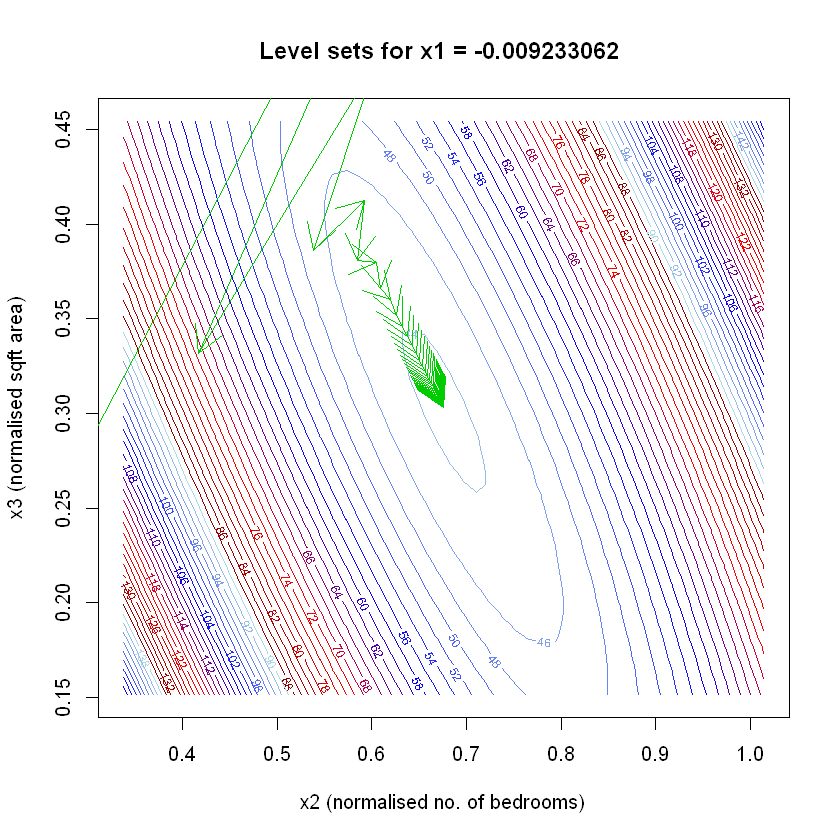

In [223]:
cols = rev(colorRampPalette(c('darkred','red','blue','lightblue'))(24))
contour(xrange2,xrange3,z = fxValues,nlevels = 80, main = "Level sets for x1 = -0.009233062 ", xlab = "x2 (normalised no. of bedrooms)", ylab = "x3 (normalised sqft area)",col = cols)
#lines(xe2,xe3,col = "red")
s <- seq(length(xe2)-1)
arrows(xe2[s], xe3[s], xe2[s+1], xe3[s+1], col = 3)

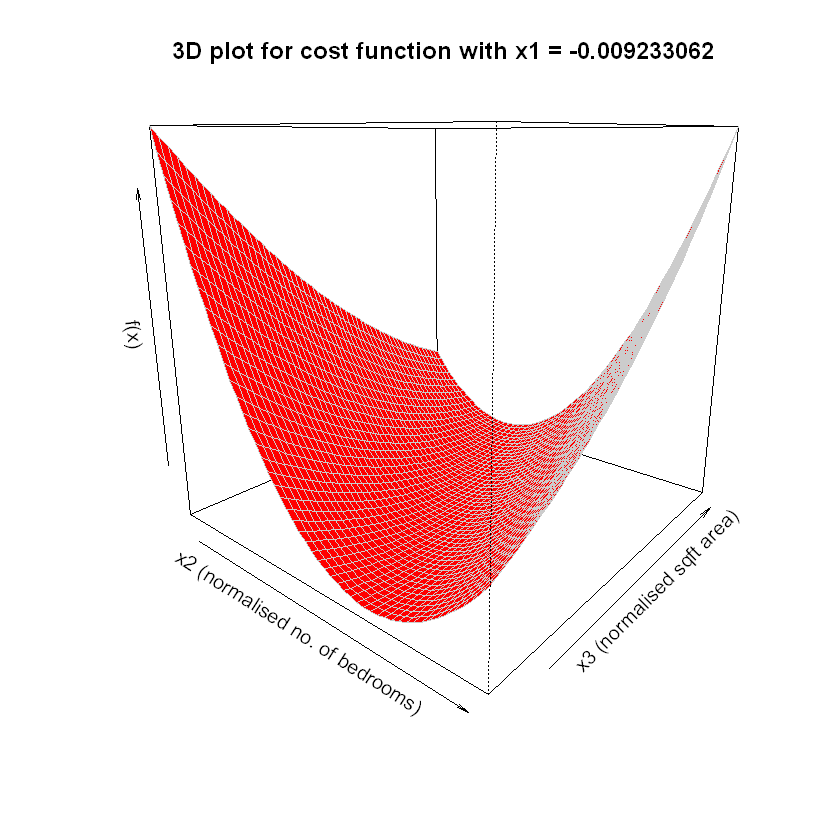

In [224]:
persp(xrange2,xrange3,fxValues, theta = 40,main = "3D plot for cost function with x1 = -0.009233062", xlab = "x2 (normalised no. of bedrooms)", ylab = "x3 (normalised sqft area)",zlab = "f(x)" , 
      col="red", border="grey80" )

#### As graph is not perfect cereal bowl shape to inspect the possible reason coorelation is calculated b/w "bd" and "sqft"

In [225]:
cor(c(A[,2]), c(A[,3]), use="complete.obs", method="pearson")

[1] 0.839675

#### Conclusion

Level set is plotted for a range of x2 and x3 with x1 kept at optimum it is observed that gradient to flow perpendicular to level sets and as visibile in the plot gradient jumped around a lot before converging to minima. For even though not shown in code 3 iterartion were done one with x = [0,0,0], one with x started with = [x1*,0.0] and final one shown in code where x1 is kept x1* for complete gradient process

3D plot is not perfect cereal bowl shape possible reason for this high coorelation between two features of the dataset as indicated indicated by correlation factor  0.839674958214801

## Question 4 -Repeat the previous question with different choise of the stepsize alpha in your implementation

#### Conclusion for part a) 

Expanding on the analysis done for Question 2, starting with alpha = 0.01 we moved to alpha = 0.0001 and for higher alpha there was no convergence. Convergence started with alpha = 0.0001 with minimum no. of iterations for alpha = 0.0008.

For this problem any alpha greater than 0.0001 will lead to covergence.   

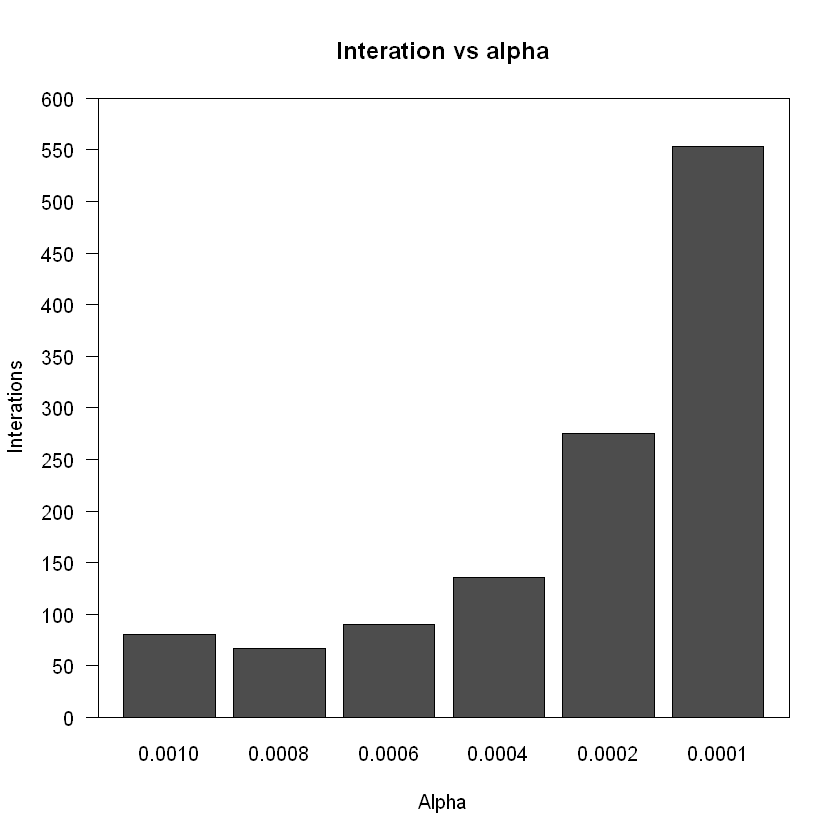

In [238]:
barplot(iternations, main="Interation vs alpha", names.arg = successalphs,
        ylab = "Interations", ylim = c(0,600), xlab = "Alpha", axes = FALSE)
ylabel <- seq(0, 700, by = 50)
axis(2, at = ylabel, las = 1)
box()

In [280]:
gradientDescent2 <- function(y1,A1,x1,advalpha,thrs, maxi, option){
    converged<-FALSE
    i=1
    x1<-x1
    gradientTrend <- c()
    alpha <- advalpha
     while((!converged  && i <= maxi))
            {
                deltaf <- deltafx(y1,A1,x1)
                if(is.nan(norm(deltaf))){
                    break
                }
         
                #option for alpha 
                if (option == 1)
                    {
                    alpha <- advalpha/i
                } else if (option == 2) 
                    {
                    alpha <- advalpha/sqrt(i)
                }
                x1 <- x1 - (alpha*deltaf)
                gradientTrend <- append(gradientTrend,norm(deltaf))
                converged <- (norm(deltaf) <= thrs)
                i <- i+1
            }

    return (list("x1"= x1,"gradientTrend" =gradientTrend, "iteration" = i-1,"converged" = converged, "alpha" = alpha ))
}

In [301]:
gdwithadpstep <- function(alphas,opt){  
    thres <- 10**(-2)
    maxiter <- 10000
    #considering first 1000 rows as for complete data convergence is not achieved 
    A3 <- A[1:1000,]
    y3 <- matrix(y[1:1000,],nrow=1000,byrow=TRUE)
    successalphs <- c()
    finalalphs <- list()
    iternations <- list()
    gradienttrend <- list()
    converged <- list()
    xs <- list()
    row = 1 

    for (alpha in alphas)
        {
            x <- matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE)
            answer <- gradientDescent2(y3,A3,x,alpha,thres,maxiter,opt)
            if (answer$converged){
                successalphs <- append(successalphs,alpha)
                converged[[row]] <- answer$converged
                finalalphs[[row]] <- answer$alpha
                xs[[row]] <- answer$x
                iternations[[row]] <- answer$iteration
                gradienttrend[[row]] <- answer$gradientTrend
                }
                row = row+1
        }

    if (is.null(successalphs))
        {
        print("Convergence not achived")
    }else {
        successalphs <- format(successalphs, scientific = FALSE)
        xs <- do.call(cbind, xs)
        iternations <- do.call(cbind, iternations)
        finalalphs <- do.call(cbind, finalalphs)
        converged <- do.call(cbind, converged)
        colnames(xs)<- successalphs
        colnames(iternations)<- successalphs
        colnames(finalalphs)<- successalphs
        colnames(converged)<- successalphs
        barplot(iternations, main="Interation vs alpha", names.arg = successalphs,
        ylab = "Interations", ylim = c(0,max(iternations)+100), xlab = "Alpha", axes = FALSE) 
        ylabel <- seq(0, max(iternations)+100, by = 50)
        axis(2, at = ylabel, las = 1)
        box()
    }
}

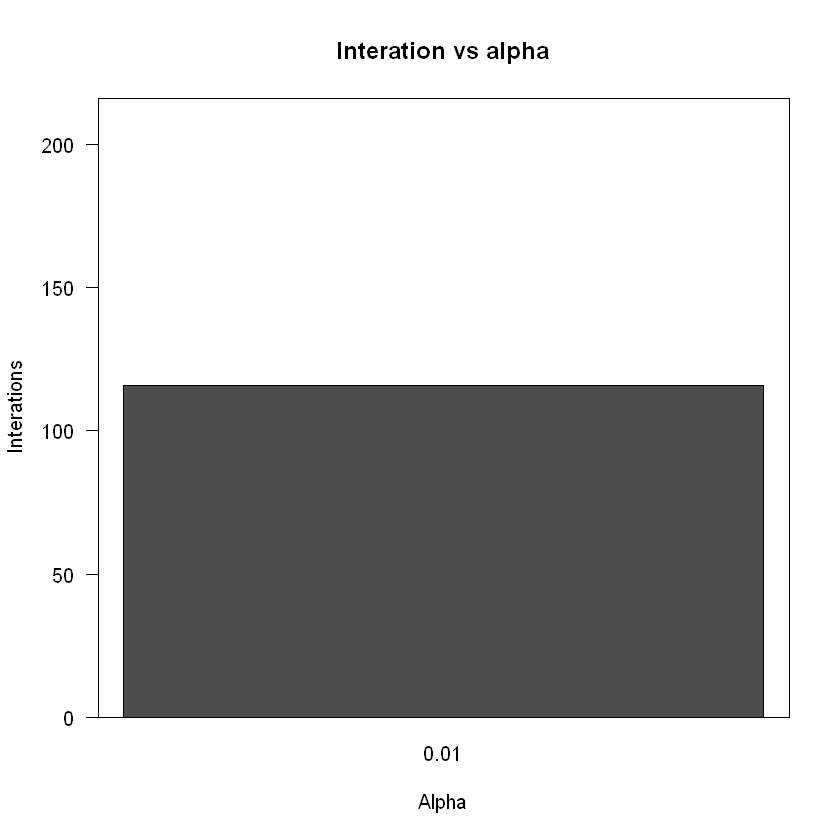

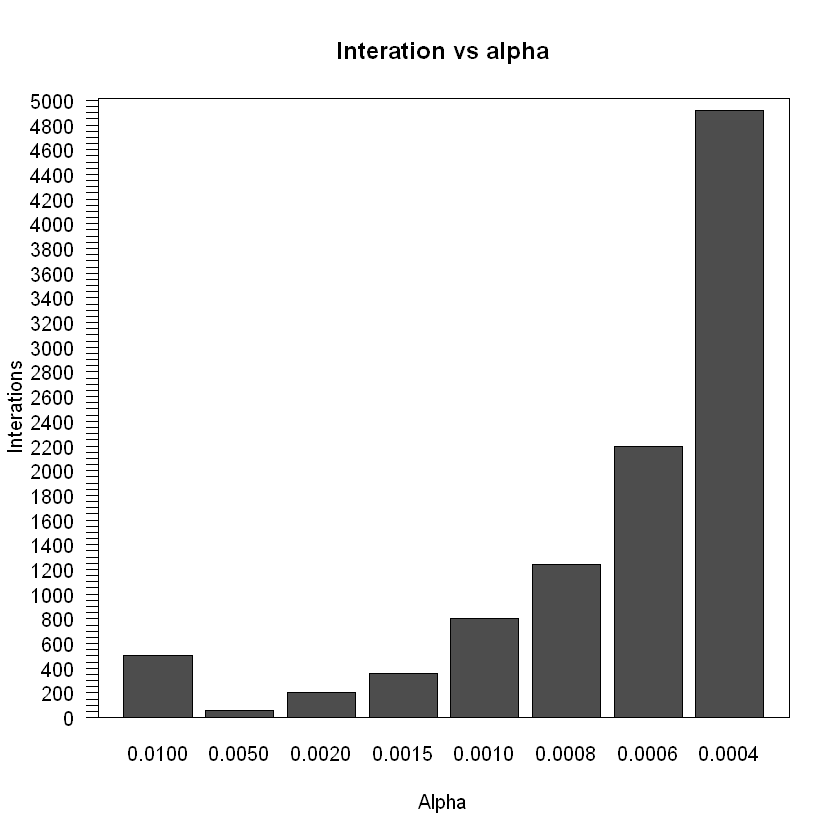

In [302]:
alphas <- c(0.1,0.01,0.005,0.002,0.0015,0.0010,0.0008,0.0006,0.0004,0.0002,0.0001)
options <- c(1,2)
for (opt in options)
{
    gdwithadpstep(alphas,opt)
}
    
